# COVID19 Vaccination in the world

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import datetime
from datetime import date as Date
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [ ]:
import plotly.express as px

In [6]:
idx = pd.IndexSlice
pd.set_option('display.max_rows', 70)

In [7]:
latin_american = pd.read_csv('data/latin_american.csv')

In [8]:
data = pd.read_csv('data/country_vaccinations.csv')
dtIndex = pd.DatetimeIndex(data.date)
data.set_index(['country', dtIndex], inplace=True)

In [9]:
data.loc['Mexico', 'people_fully_vaccinated'].fillna(method='ffill', inplace=True);
data.loc['Mexico', 'people_vaccinated'].fillna(method='ffill', inplace=True);

(18616.1, 18690.9, 0.0, 2.05750125)

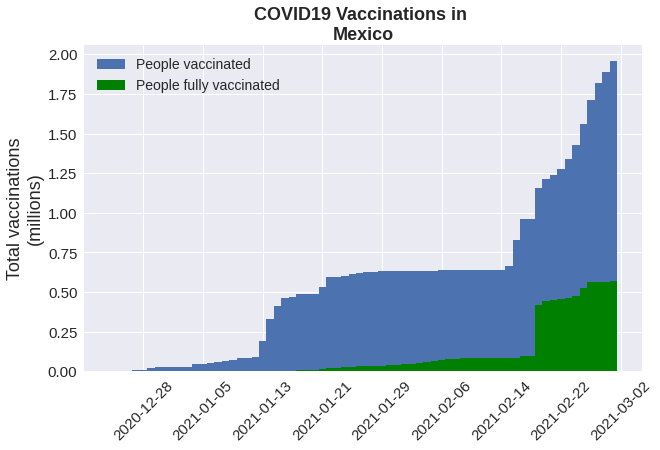

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(data.loc['Mexico'].index, 
       data.loc[idx['Mexico', :], 'people_vaccinated']/1_000_000, 
       width=1, label='People vaccinated')
ax.bar(data.loc['Mexico'].index, 
       data.loc[idx['Mexico', :], 'people_fully_vaccinated']/1_000_000, 
       width=1, label='People fully vaccinated', color='green')

ax.xaxis.set_major_locator(MaxNLocator(10))
ax.tick_params(axis='x', rotation=45, labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set_ylabel('Total vaccinations\n(millions)', fontsize=18)
ax.legend(loc='upper left', fontsize=14)

ax.set_title('COVID19 Vaccinations in \nMexico', fontsize=18, 
             fontweight='bold')

ax.axis()

In [11]:
country_vacs = pd.Series(dtype=int)
lat_country_vacs = pd.Series(dtype=int)

for country in data.index.levels[0]:
    country_vacs[country] = data.loc[idx[country], 'total_vaccinations'].iloc[-1]
    if country in latin_american.values:
        lat_country_vacs[country] = data.loc[idx[country], 'total_vaccinations'].iloc[-1]

country_vacs.sort_values(inplace=True, ascending=False)
lat_country_vacs.sort_values(inplace=True, ascending=False)

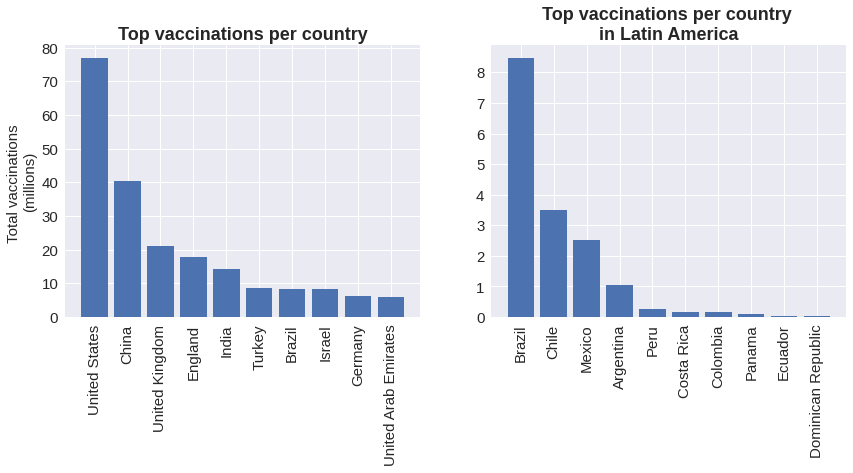

In [12]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax.bar(country_vacs.index[:10], country_vacs.iloc[:10]/1_000_000)

ax.set_ylabel('Total vaccinations \n(millions)', fontsize=15)
ax.tick_params(axis='x', labelsize=15, rotation=90)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('Top vaccinations per country', fontsize=18, fontweight='bold')


ax2.bar(lat_country_vacs.index[:10], lat_country_vacs.iloc[:10]/1_000_000)
ax2.tick_params(axis='x', labelsize=15, rotation=90)
ax2.tick_params(axis='y', labelsize=15)
ax2.set_title('Top vaccinations per country \nin Latin America', fontsize=18, 
             fontweight='bold')

plt.show()

In [13]:
column = 'people_vaccinated_per_hundred'
for country in data.index.levels[0]:
    data.loc[idx[country], column].fillna(method='ffill', inplace=True)

In [14]:
data.columns

Index(['iso_code', 'date', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'vaccines', 'source_name',
       'source_website'],
      dtype='object')

Text(0.5, 0.98, 'People vaccinated per hundred')

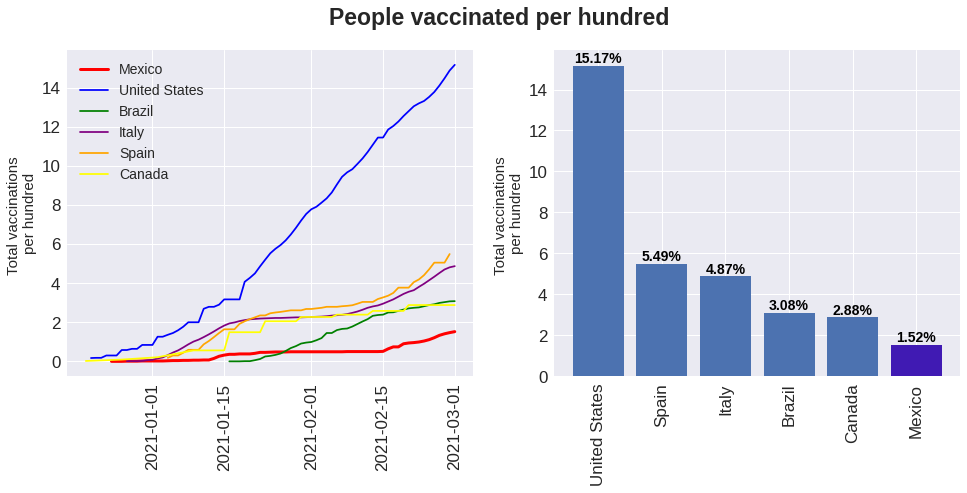

In [39]:
countries = {'Mexico':{'color':'red', 'label':'Mexico', 'lw':3},
             'United States': {'color':'blue', 'label':'United States'}, 
             'Brazil': {'color':'green', 'label':'Brazil'}, 
             'Italy': {'color':'purple', 'label':'Italy'},
             'Spain': {'color': 'orange', 'label':'Spain'}, 
             'Canada': {'color': 'yellow', 'label':'Canada'}}

country_vacs_ph = pd.Series(dtype=int)

for country in countries.keys():
    country_vacs_ph[country] = data.loc[idx[country], 'people_vaccinated_per_hundred'][-1]
    
country_vacs_ph.sort_values(ascending=False, inplace=True)
    
    
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for country, params in countries.items():
    ax.plot(
        data.loc[idx[country]].index,
        data.loc[idx[country], 'people_vaccinated_per_hundred'],
        **params
    )
    
ax.legend(loc='upper left', fontsize=14)
ax.tick_params(axis='x', rotation=90, labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylabel('Total vaccinations \nper hundred', fontsize=15)

ax2.bar(country_vacs_ph.index, country_vacs_ph.values)
ax2.set_ylabel('Total vaccinations \nper hundred', fontsize=15)
ax2.tick_params(axis='x', rotation=90, labelsize=17)
ax2.tick_params(axis='y', labelsize=17)
ax2.bar('Mexico', country_vacs_ph['Mexico'], color=(0.25,0.1,0.7))

for country, value in country_vacs_ph.items():
    ax2.text(country, value, f'{value}%', ha='center', va='bottom', 
             fontsize=14, color='black', fontweight='bold')
    
fig.suptitle('People vaccinated per hundred', fontsize=23, fontweight='bold')

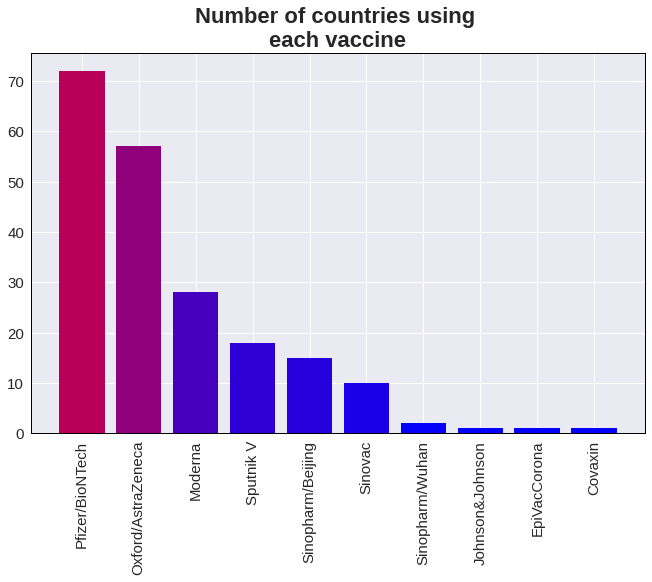

In [40]:
vaccines_all = []
vaccines_freqs = pd.Series()

for country in data.index.levels[0]:
    vaccines = data.loc[idx[country], 'vaccines'][-1]
    vaccines_all.extend(vaccines.split(', '))

for vaccine in vaccines_all:
    if vaccine in vaccines_freqs:
        vaccines_freqs[vaccine] += 1
    else:
        vaccines_freqs[vaccine] = 1
        
vaccines_freqs.sort_values(inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(11, 7))

for vac, freq in zip(vaccines_freqs.index, vaccines_freqs.values):
    ax.bar(vac, freq,  color=(freq/100, 0, 1-freq/110))
    
ax.tick_params(axis='x', rotation=90, labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('Number of countries using \neach vaccine', 
             fontsize=22, fontweight='bold')

for spin in ['top', 'right', 'bottom', 'left']:
    ax.spines[spin].set(linewidth=1, color='black')

plt.show()

In [41]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
py.iplot(table, filename='jupyter-table1')

ModuleNotFoundError: No module named 'chart_studio'

In [1]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
py.iplot(table, filename='jupyter-table1')

PlotlyRequestError: Authentication credentials were not provided.